In [105]:
# import the needed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [106]:
heart = pd.read_csv("https://raw.githubusercontent.com/SUM31/HEY/master/heart.csv")

In [107]:
heart.head()  #displays top 5 entries

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [108]:
heart.target.value_counts() #no. of patients having heart diseases

1    165
0    138
Name: target, dtype: int64

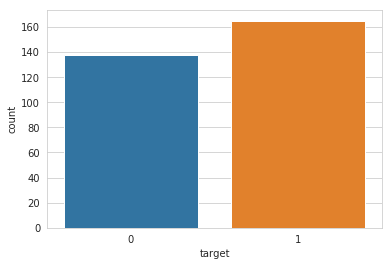

In [109]:
#165 patients have heart disease...
#in graphical form
sns.countplot(x="target",data=heart,)
plt.show()

In [110]:
countNoDisease = len(heart[heart.target == 0])
countHaveDisease = len(heart[heart.target == 1])
print("Percentage of Patients not having Heart Disease: {:.2f}%".format((countNoDisease / (len(heart.target))*100)))
print("Percentage of Patients Having Heart Disease: {:.2f}%".format((countHaveDisease / (len(heart.target))*100)))

Percentage of Patients not having Heart Disease: 45.54%
Percentage of Patients Having Heart Disease: 54.46%


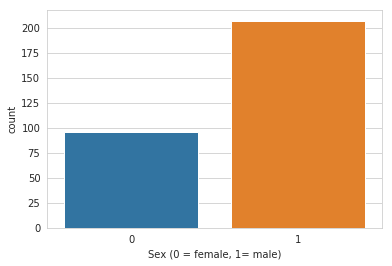

In [111]:
#classification of patients between male and female and visualize it.
sns.countplot(x='sex', data=heart,)
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [112]:
countFemale = len(heart[heart.sex == 0])
countMale = len(heart[heart.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(heart.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(heart.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


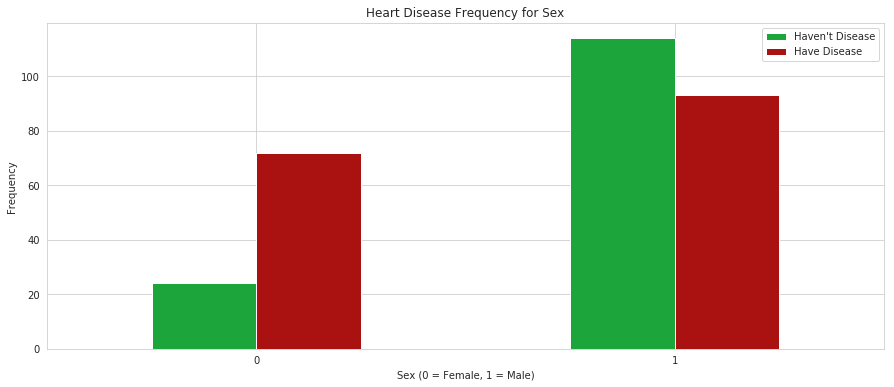

In [113]:
pd.crosstab(heart.sex,heart.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

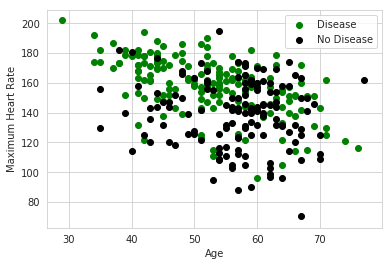

In [114]:
# relation of age and max heart rate.
plt.scatter(x=heart.age[heart.target==1], y=heart.thalach[(heart.target==1)], c="green")
plt.scatter(x=heart.age[heart.target==0], y=heart.thalach[(heart.target==0)], c = 'black')
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

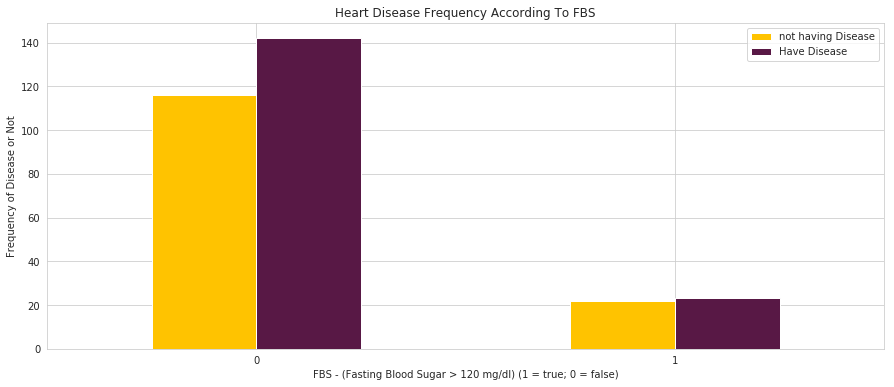

In [115]:
pd.crosstab(heart.fbs,heart.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["not having Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

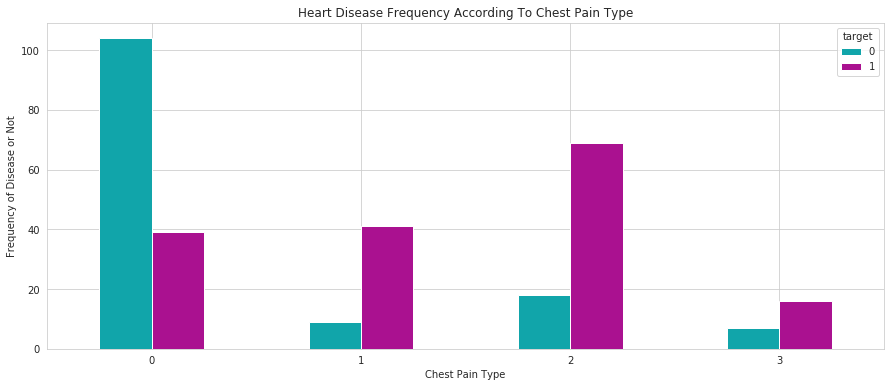

In [116]:
pd.crosstab(heart.cp,heart.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [117]:
y = heart.target.values
x_data = heart.drop(['target'], axis = 1)

In [118]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0) #We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [120]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [121]:
#KNN model
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 83.61%


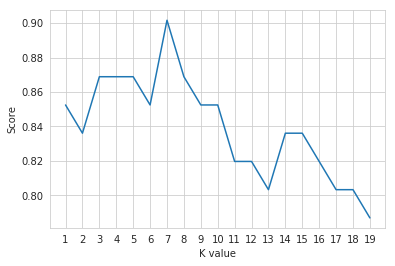

Maximum KNN Score is 90.16%


In [122]:
#findng best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
accuracies = {}
acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

In [123]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 75.41%


In [124]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 85.25%


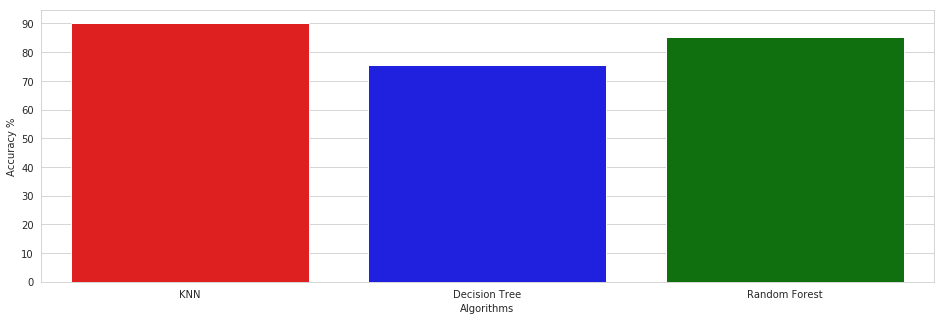

In [125]:
#comparison
colors = ["RED","BLUE","GREEN"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [ ]:
Our models work fine but best of them is KNN with 90.16% of accuracy.